In [9]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [10]:
# 🔹 Step 1: Load the preprocessed dataset
final_df = pickle.load(open('dataset_final.pkl', 'rb'))

In [11]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
23187,Pakistan,Sri Lanka,Colombo,101,45,-66,8.080000,43.0,172
14029,South Africa,England,Cape Town,143,19,-64,8.495050,65.0,191
36029,Australia,Pakistan,Dubai,33,82,-13,5.210526,23.0,89
25428,Australia,Sri Lanka,Barbados,108,22,-86,6.612245,35.0,168
32875,South Africa,Australia,Colombo,33,86,-23,5.823529,31.0,146
...,...,...,...,...,...,...,...,...,...
32544,India,Australia,Colombo,76,49,-44,6.422535,20.0,140
15001,Sri Lanka,New Zealand,Auckland,69,40,-73,5.175000,18.0,115
22545,Sri Lanka,India,Colombo,74,66,-10,8.222222,36.0,171
12619,Sri Lanka,Pakistan,Lahore,100,53,-46,8.955224,44.0,182


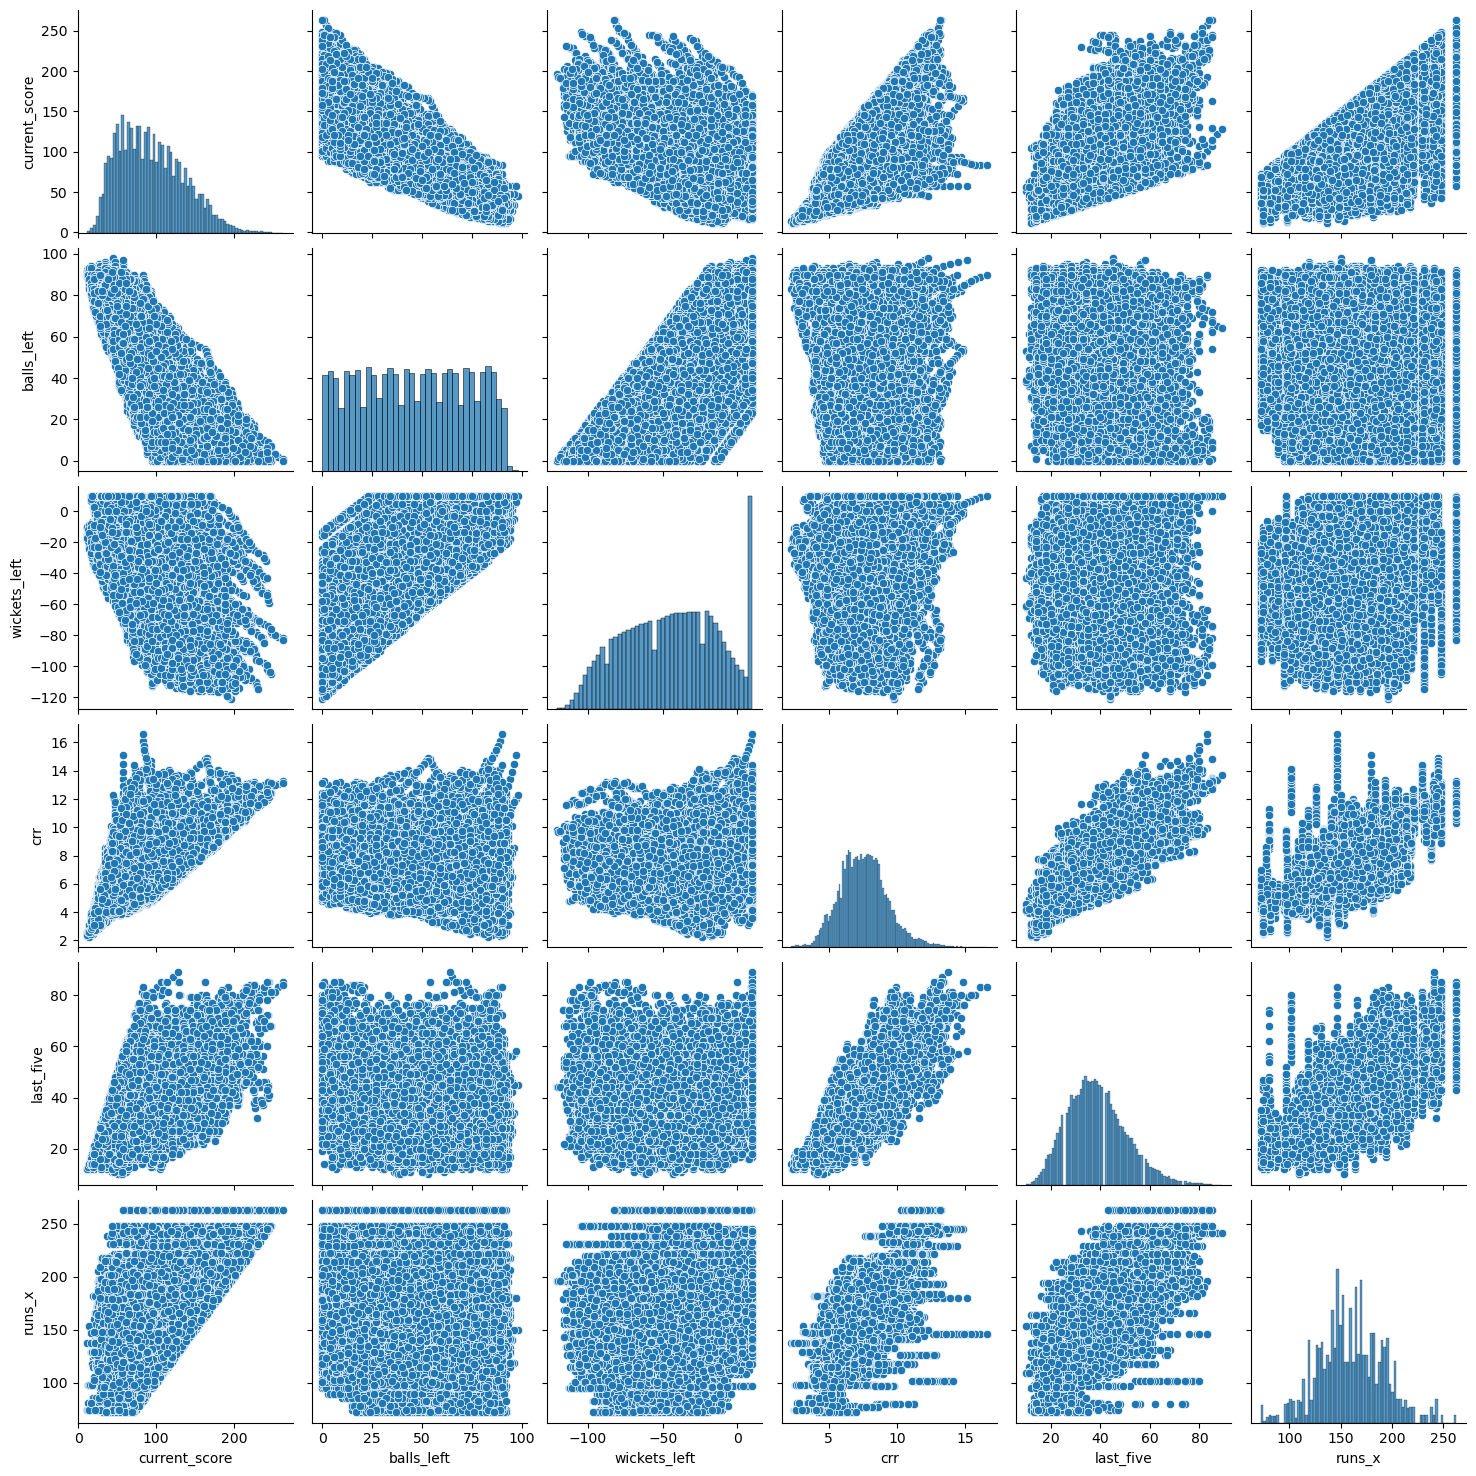

In [14]:
# Assuming final_df is your DataFrame
sns.pairplot(data=final_df)
plt.show()

In [15]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

In [21]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [22]:
pipe = Pipeline(steps=[
    # Step 1: Apply column transformer (includes OneHotEncoding for categorical features)
    ('step1', trf),
    
    # Step 2: Standardize the data using StandardScaler
    ('step2', StandardScaler()),
    
    # Step 3: Train the model using Linear Regression
    ('step3', DecisionTreeRegressor())
])

In [23]:
pipe.fit(X_train,y_train)

C:\Users\MAHAD\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', DecisionTreeRegressor())])

In [24]:
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("R² Score     :", r2*100)
print("MAE          :", mae)
print("MSE          :", mse)
print("RMSE         :", rmse)

R² Score     : 94.74198488305213
MAE          : 1.6303274428274428
MSE          : 52.80236486486486
RMSE         : 7.266523574919774


In [25]:
# Accuracy
pipe.score(X_test,y_test)*100)
# Accuracy
print(pipe.score(X_train,y_train)*100)

94.74198488305213

100.0